In [341]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

(100,)


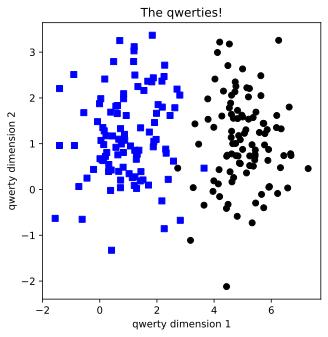

In [342]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

print(a[0].shape)


# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [343]:

Ann_classify = nn.Sequential(

        nn.Linear(2,1),
        nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid()

    ) 


In [344]:
help(nn.Sequential.parameters)

Help on function parameters in module torch.nn.modules.module:

parameters(self, recurse: bool = True) -> Iterator[torch.nn.parameter.Parameter]
    Returns an iterator over module parameters.
    
    This is typically passed to an optimizer.
    
    Args:
        recurse (bool): if True, then yields parameters of this module
            and all submodules. Otherwise, yields only parameters that
            are direct members of this module.
    
    Yields:
        Parameter: module parameter
    
    Example::
    
        >>> # xdoctest: +SKIP("undefined vars")
        >>> for param in model.parameters():
        >>>     print(type(param), param.size())
        <class 'torch.Tensor'> (20L,)
        <class 'torch.Tensor'> (20L, 1L, 5L, 5L)



In [345]:
for param in Ann_classify.parameters():

    print(param.size())



torch.Size([1, 2])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1])


In [346]:
# other model features

learningRate = .1

# loss function
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(Ann_classify.parameters(),lr=learningRate)

In [347]:
epochN = 1000

losses = np.zeros(epochN)


for epoch in range(epochN):


    y_hat = Ann_classify(data)

    loss = lossfun(y_hat,labels)
    losses[epoch] = loss


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()





print(losses)


[0.69309127 0.69253236 0.69199097 0.69146627 0.69095725 0.69046319
 0.68998313 0.68951637 0.68906212 0.68861771 0.68817866 0.68774879
 0.68731475 0.68688917 0.68647212 0.68606263 0.68565804 0.68524551
 0.68483889 0.68442571 0.68399042 0.68354642 0.68307465 0.68257743
 0.68205851 0.68151337 0.68093216 0.68030196 0.67966962 0.67903465
 0.67839676 0.67775565 0.67710608 0.67641312 0.67571527 0.67501223
 0.67430377 0.67356545 0.67277926 0.67195463 0.67111039 0.67022002
 0.66926354 0.66824156 0.667184   0.66611403 0.66503167 0.66393679
 0.66282916 0.66165704 0.66030675 0.65890008 0.65747094 0.65586817
 0.65411544 0.65232378 0.65047544 0.64852262 0.6465475  0.6444909
 0.6421715  0.63982838 0.63746071 0.63496226 0.63239145 0.62976563
 0.62702984 0.6242649  0.6213336  0.61822939 0.61482692 0.61117917
 0.60743535 0.60368484 0.59982145 0.59591019 0.59214288 0.58828831
 0.58435863 0.58024025 0.57631493 0.572644   0.56898767 0.5653972
 0.56193376 0.55866998 0.55564916 0.552697   0.54996985 0.547401

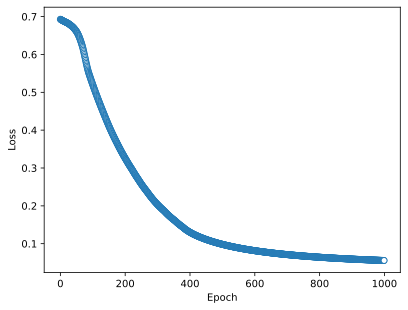

In [348]:
plt.plot(losses,'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [349]:
y_final = Ann_classify(data)


In [350]:
predictions = Ann_classify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)


Final accuracy: 99%


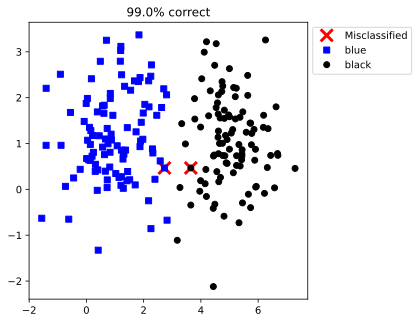

In [351]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()